In [1]:
from mne.io import read_raw_fif
from brainpipe.feature import power
import numpy as np
import neurokit
import time
import matplotlib.pyplot as plt

In [2]:
# 1.
# Fetch time series data from any file whatsoever
# Must be at least 30 seconds at 250Hz

raw = read_raw_fif('/home/hyruuk/GitHub/eegsynth/datafiles/SA04_01_preprocessed.fif.gz', preload=True)
raw_rs = raw.copy().resample(250)
sf = raw_rs.info['sfreq']

data = np.asarray(raw_rs.get_data()[1:3,7500:15000])

Opening raw data file /home/hyruuk/GitHub/eegsynth/datafiles/SA04_01_preprocessed.fif.gz...


<ipython-input-2-90f7a2101220>:5: RuntimeWarning: This filename (/home/hyruuk/GitHub/eegsynth/datafiles/SA04_01_preprocessed.fif.gz) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw = read_raw_fif('/home/hyruuk/GitHub/eegsynth/datafiles/SA04_01_preprocessed.fif.gz', preload=True)


    Read 5 compensation matrices
    Range : 0 ... 431999 =      0.000 ...   359.999 secs
Ready.
Current compensation grade : 3
Reading 0 ... 431999  =      0.000 ...   359.999 secs...


(2, 7500)
0.10477089881896973
(5, 1, 7500, 2)
None
Done


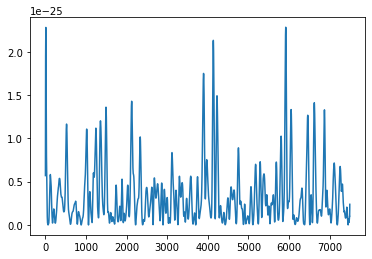

In [3]:
# 2.
# Compute hilbert using brainpipe
f = [ [2, 4], [4, 8], [8, 12], [12, 30], [30, 60] ]
npts = data.shape[1]
print(data.shape)
power_obj = power(sf, npts, f=f, baseline=None, norm=None, method='hilbert', window=None, width=None, step=None, split=None, time=None)
start = time.time()
power_vals = power_obj.get(data.T)
stop = time.time()
print(stop-start)
print(power_vals[0].shape)
print(power_vals[1])
print('Done')

powow = power_vals[0].squeeze()

dtp = powow[2,:,0]
t = np.arange(0,len(dtp),1)
plt.plot(t, dtp)
plt.show()



In [4]:
# 3.
# Compute complexity using neurokit
start = time.time()
comp = neurokit.complexity(dtp)
stop = time.time()
print("duration of computation :")
print(stop-start)
print(comp)


NeuroKit warning: complexity(): Failed to compute sample entropy (sampen).
NeuroKit warning: complexity(): Failed to compute Multiscale Entropy (MSE).


/home/hyruuk/anaconda3/envs/electrophy/lib/python3.7/site-packages/neurokit/signal/complexity.py:502: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  (p, r1, r2, s)=np.linalg.lstsq(x, L)


duration of computation :
20.15939998626709
{'Entropy_Shannon': 12.872674880268457, 'Entropy_Sample': nan, 'Entropy_Multiscale': nan, 'Entropy_Spectral': 3.143105009064961, 'Entropy_SVD': 0.13237138166816045, 'Fractal_Dimension_Correlation': 0.9478389774446396, 'Fractal_Dimension_Higushi': 1.0118153614164205, 'Fractal_Dimension_Petrosian': 1.0010719287816965, 'Fisher_Information': 0.9451391462517459, 'Hurst': 0.8675279063726271, 'DFA': 1.5480050444593054}
